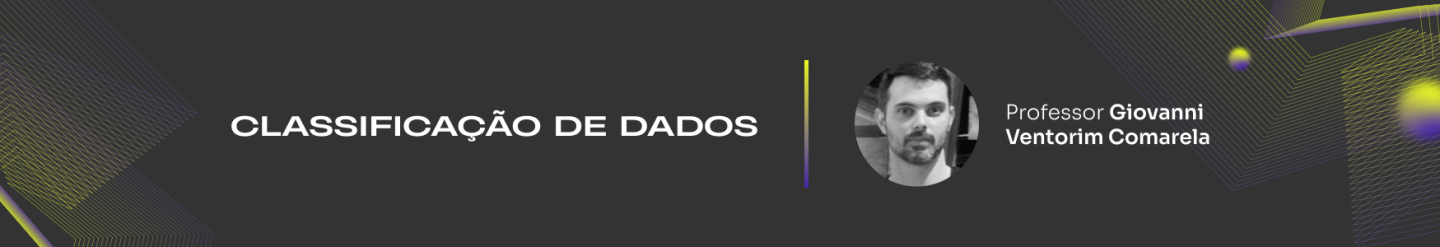

# Introdução à Regressão Logística

Na aula de hoje, veremos uma segunda maneira de fazer classificação de dados: a **Regressão Logística**.

Considere o contexto dado a seguir.

Suponha que você esteja observando uma variável binária (i.e., que pode assumir dois valores, 0 ou 1).

Esses valores podem indicar Passar ou Reprovar, Admitido ou Rejeitado, Esquerda ou Direita, etc.

Suponha também que exista uma **probabilidade** de se observar o valor 1, e que essa probabilidade é uma função de algumas variáveis (características).

Assim, as propriedades-chave de um problema que o fazem apropriado para ser abordado com Regressão Logística são:
- O que você pode observar são variáveis **categóricas** (a classe ou rótulo);
- Você também tem interesse em estimar a **probabilidade** de se observar um rótulo específico.

Vamos elaborar mais esse contexto por meio de um exemplo.

## Exemplo - Probabilidade de ser admitido na Pós-Graduação

Exemplo baseado no material disponível em: https://stats.oarc.ucla.edu/r/dae/logit-regression/

Suponha um pesquisador interessado em saber como variáveis, como GRE (*Graduate Record Exam*), GPA (*Grade Point Average*) e o prestígio da Universidade onde o aluno fez graduação podem afetar a admissão do aluno na pós-graduação.

**Observação:** esse exemplo e os dados utilizados são baseados no contexto da pós-graduação nos Estados Unidos.

Assim, há três variáveis preditoras (características ou atributos): ``gre``, ``gpa`` e ``rank``.
- ``gre`` e ``gpa`` serão tratadas como contínuas.
- ``rank`` tem valores inteiros de 1 a 4. ``rank`` com valor 1 indica o prestígio mais alto, enquanto o valor 4 indica o prestígio mais baixo.

Cada linha da matriz abaixo é referente a uma aplicação para uma pós-graduação. A coluna ``admit`` indica se o aluno aplicante foi aceito ou não (1 para sim e 0 para não).

In [ ]:
import pandas as pd

df = pd.read_csv('https://stats.idre.ucla.edu/stat/data/binary.csv')
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


Vejamos algumas características do conjunto de dados.

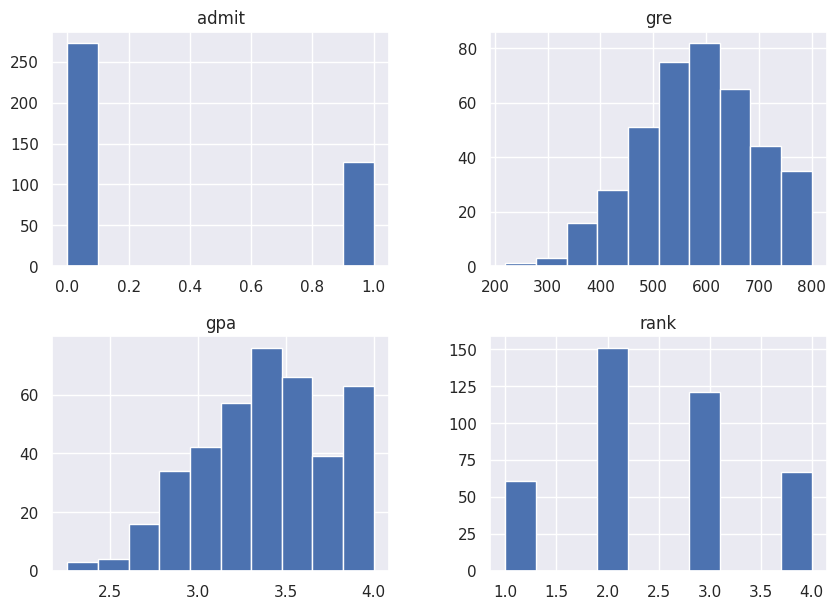

In [ ]:
#@title
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

ax = plt.figure(figsize = (10,7)).add_subplot()
df.hist(ax = ax);

Vamos olhar também para a probabilidade de admissão em função de cada uma das características contidas no conjunto de dados.

Primeiro, o ``rank``.

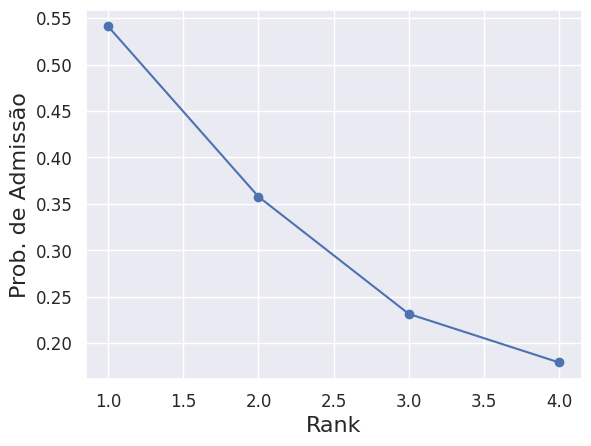

In [ ]:
ax = df.groupby('rank').mean()['admit'].plot(marker = 'o', fontsize = 12)
ax.set_ylabel('Prob. de Admissão', fontsize = 16)
ax.set_xlabel('Rank', fontsize = 16);

Agora, o ``gre``.

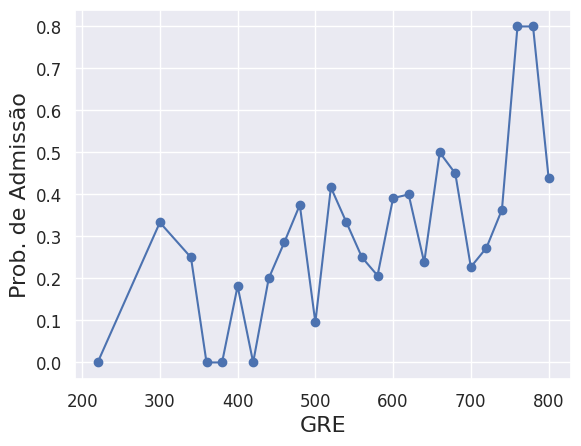

In [ ]:
ax = df.groupby('gre').mean()['admit'].plot(marker = 'o', fontsize = 12)
ax.set_ylabel('Prob. de Admissão', fontsize = 16)
ax.set_xlabel('GRE', fontsize = 16);

Por fim, o ``gpa`` (para facilitar a visualização, os valores de ``gpa`` são agrupados em 10 intervalos).

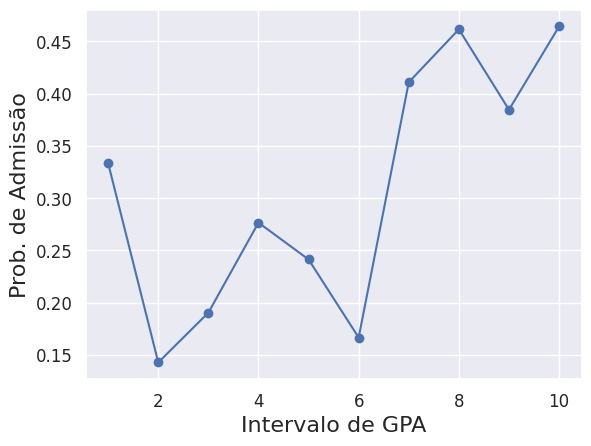

In [ ]:
bins = np.linspace(df.gpa.min(), df.gpa.max(), 10)
ax = df.groupby(np.digitize(df.gpa, bins)).mean()['admit'].plot(marker = 'o', fontsize = 12)
ax.set_ylabel('Prob. de Admissão', fontsize = 16)
ax.set_xlabel('Intervalo de GPA', fontsize = 16);

Pode-se perceber que há uma boa correlação entre cada uma das três características e a probabilidade de um aluno ser admitido na pós-graduação.

Se houver interesse em estimar a **probabilidade** de admissão de um candidato, a Regressão Logística pode ser uma ferramenta interessante!

Além disso, uma vez que a probabilidade for estimada, ela pode ser utilizada para classificação (Entre admissão ou não)! Veremos como isso pode ser feito mais adiante!

## Formulação básica (versão simplificada)

Como mencionado anteriormente, a Regressão Logística se preocupa em estimar a **probabilidades**! Mas o que está disponível no conjunto de dados são observações de uma variável categórica (no exemplo, ser admitido ou não na pós-graduação).

Poderíamos tentar estimar tais probabilidades fazendo uso de um modelo linear do tipo $\alpha + \mathbf{\beta}^T\mathbf{x}$, onde:
- $\mathbf{x} \in \mathbb{R}^d$ representa o vetor de características (no exemplo acima, ``gre``, ``gpa`` e ``rank``);
- $\mathbf{\beta} \in \mathbb{R}^d$ é o vetor de coeficientes, o qual indica o "peso" de cada característica de $\mathbf{x}$;
- $\mathbf{\beta}^T$ representa o vetor linha, trasposto do vetor $\mathbf{\beta}$;
- $\mathbf{\beta}^T\mathbf{x}$ representa o produto escalar entre $\mathbf{x}$ e $\mathbf{\beta}$, i.e., $\mathbf{\beta}^T\mathbf{x} = \sum_{i = 1}^d \beta_ix_i$; e
- $\alpha \in \mathbb{R}$ é uma constante.

No entanto, uma função linear pode assumir qualquer valor real, e probabilidades devem estar restritas ao intervalo $(0, 1)$.

Para resolver esse problema, a Regressão Logística tenta estimar com uma função linear uma transformação das probabilidades: os **log-odds** ou **logits**.

**Definição:** para qualquer probabilidade $p \in (0, 1)$, a **odd** associada a $p$ é dada por $$\frac{p}{1-p}.$$




**Definição:** para qualquer probabilidade $p  \in (0, 1)$, o **log-odd** ou **logit** de $p$ é dado por $$\log{\frac{p}{1-1}}.$$

Dessa forma, a Regressão Logística tenta encontrar um modelo linear para prever os logits. Em outras palavras, a ideia é escrever

$$\alpha + \mathbf{\beta}^T\mathbf{x} = \log{\frac{p(\mathbf{x})}{1 - p(\mathbf{x})}},$$

onde $p(\mathbf{x})$ representa a probabilidade de um objeto $\mathbf{x}$ ser da classe 1 (no nosso exemplo, de ser admitido na pós-graduação).




Observe que a equação acima pode ser manipulada de forma que $p(\mathbf{x})$ possa ser obtida em função de $\alpha$ e $\mathbf{\beta}$:

$$p(\mathbf{x}) = \frac{e^{\alpha + \mathbf{\beta}^T\mathbf{x}}}{1 + e^{\alpha + \mathbf{\beta}^T\mathbf{x}}}.$$




## Na Prática

Em resumo, a entrada e a saída da Regressão Logística são

### Entrada

Um conjunto de dados $D = \{(\mathbf{x}_i, y_i)\}_{i = 1}^n$, onde os $\mathbf{x}_i$'s descrevem os objetos de interesse (vetores de características) e os $y_i$'s são os rótulos (classes) de cada objeto.

### Saída

Uma função $p$, que para um dado vetor de características $\mathbf{x}$, permite calcular $p(\mathbf{x})$, as probabilidades de $\mathbf{x}$ pertencer a cada uma das possíveis classes.

Em cenários nos quais há apenas duas classes, geralmente, $p(\mathbf{x})$ representa a probabilidade de $\mathbf{x}$ pertencer à classe 1.

**Observação:** está fora do escopo dessa disciplina apresentar como os parâmetros $\mathbf{\alpha}$ e $\mathbf{\beta}$ são estimados. Os interessados podem consultar as referências disponíveis no fim desse material.

## Como fazer a classificação?

Bom, se a Regressão Logística no ajuda a estimar a probabilidade de um $\mathbf{x}$ pertencer a uma certa classe, como isso nos ajuda na tarefa de classificação?

Interessantemente, a Regressão Logística pode ser vista como uma ferramenta de classificação. Considere, por exemplo, o caso de um problema de classificação binária (apenas classe 0 ou classe 1).

Para um dado $\mathbf{x}$ a ser classificado, podemos calcular $p(\mathbf{x})$.

Assim, associamos $\mathbf{x}$ à classe 1 caso $p(\mathbf{x}) > 0.5$, e à classe 0 caso contrário!

## Regressão Logística na ``scikit-learn``




A biblioteca ``scikit-learn`` possui uma implementação de um classificador baseado em [Regressão Logística](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html), que funciona de forma análoga aos classificadores que vimos anteriormente.

Vamos demonstrar o uso dessa implementação para o conjunto de dados utilizado no exemplo do início da aula.

In [ ]:
X = df[['gpa', 'gre', 'rank']]
y = df.admit

Lembrando que, a avaliação de um classificador nunca deve ser feita com o mesmo conjunto de dados que foi utilizado para treinar o classificador.

Assim, vamos reter 30% dos dados para realização de testes.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

Após isso, precisamos construir o classificador e realizar o treinamento com os dados do conjunto de treinamento.

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train);

Após o treinamento, o modelo pode ser utilizado para prever a classe dos elementos do conjunto de teste.

In [ ]:
y_pred = model.predict(X_test);

Para avaliar o modelo obtido, podemos calcular a taxa de acertos (ou acurácia) dos elementos do conjunto de teste.

In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print("Acurácia do Classificador = %f" % acc)

Acurácia do Classificador = 0.666667


## Regressão Logística na ``scikit-learn`` - Outro Exemplo

De forma similar ao que fizemos com o classificador KNN na aula passada, vamos ver como o classificador baseado em Regressão Logística se comporta no conjunto de dados ``wine``.

In [ ]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# obtendo os dados
wine = datasets.load_wine(return_X_y = False, as_frame = True)
X = wine.data
y = wine.target.values

# devidindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

# Aplicando transformação por reescala
scaler = preprocessing.MinMaxScaler(feature_range = (0, 1))
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

# Ajustando o modelo
model = LogisticRegression()
model.fit(X_train_scaled, y_train);

# Aplicando a mesma transformação nos dados de teste
X_test_scaled = scaler.transform(X_test)

# Realizando a previsão para os dados de teste
y_pred = model.predict(X_test_scaled);

# Medindo a acurácia do modelo nos dados de teste
acc = accuracy_score(y_test, y_pred)
print("Acurácia do Classificador = %f" % acc)

Acurácia do Classificador = 1.000000


Pode-se perceber que o classificador, assim como o KNN, teve um bom resultado para o conjunto de dados ``wine``.

## Regressão Logística na ``scikit-learn`` - Considerações

Caso vocês leiam a [documentação](https://scikit-learn.org/1.5/modules/linear_model.html#logistic-regression) da ``scikit-learn`` sobre Regressão Logística, poderão observar que o classificador implementado é muito mais complexo e sofisticado que a intuição sobre o classificador apresentada nessa aula.

As referências contidas no fim desse material apresentam vários aspectos importantes sobre o classificador, mas que estão fora do escopo dessa disciplina. Aos interessados, é recomendada a leitura!

Em especial, a versão da ``scikit-learn`` possui um hiperparâmetro (parâmetros que devem ser fornecidos pelo usuário do classificador) que não deve ser ignorado, o $C$.

O hiperparâmetro $C$ está relacionado ao conceito de **regularização**. Em aulas futuras (dessa disciplina e de outras do curso), esse conceito será abordado de maneira mais natural.

De toda forma, é importante que vocês saibam que esse hiperparâmetro deve ser escolhido. Em aulas futuras dessa disciplina, veremos técnicas para fazer essa escolha de maneira adequada.

## Referências

1. Aula do Professor [Mark Crovella](https://github.com/mcrovella/CS506-Computational-Tools-for-Data-Science/blob/master/18-Regression-II-Logistic.ipynb).

2. Documentação da biblioteca [``scikit-learn``](https://scikit-learn.org/).

3. Capítulo 24 do Livro [Data Mining and Machine Learning: Fundamental Concepts and Algorithms](https://dataminingbook.info/) (Esse é um texto mais avançado e está disponível *online*)

4. Capítulo 4 do Livro [An Introduction to Statistical Learning](https://www.statlearning.com/) (Esse é um texto mais acessível e também está disponível *online*)